In [1]:
import pandas as pd
import numpy as np

### Born

In [ ]:
months = pd.date_range('2006-01-01','2017-01-01', 
              freq='MS').strftime("%Y-%b").tolist()

In [ ]:
born = pd.read_csv('raw_born.csv', index_col = 0, header=0 )

In [30]:
t = born.iloc[0,:].apply(lambda x: '-' in x).values
list_wod = [i for i, x in enumerate(t) if x]

In [59]:
born = born.drop(born.columns[list_wod], axis = 1)
born.columns = months
born = born.drop(born.index[[0]])
born = born.transpose()
born = born.apply(pd.to_numeric)

In [75]:
born.to_csv("medium_born.csv")

In [156]:
months = pd.date_range('2017-01-01','2019-01-01', 
              freq='MS').strftime("%Y-%b").tolist()

In [157]:
born = pd.read_csv('raw_born_new.csv', index_col = 0, header=0 )

In [158]:
t = born.iloc[0,:].apply(lambda x: '-' in x).values
list_wod = [i for i, x in enumerate(t) if x]

In [159]:
born = born.drop(born.columns[list_wod], axis = 1)
born.columns = months
born = born.drop(born.index[[0]])
born = born.transpose()
born = born.apply(pd.to_numeric)

In [165]:
born_old = pd.read_csv('medium_born.csv', index_col = 0, header=0).iloc[:-1,:]

In [167]:
born = born_old.append(born)

In [168]:
born.to_csv("medium_born.csv")

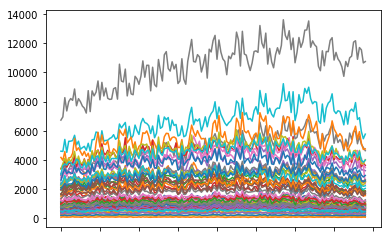

In [169]:
born.plot(legend = False);

### Change

In [256]:
change = pd.read_csv('raw_change.csv', index_col = (0,1) )

In [118]:
t = change.index.get_level_values(1).map(lambda x: '-' in x)#.values
list_wod = [i for i, x in enumerate(t) if x]

In [ ]:
change = change.drop(change.index[list_wod], axis = 0)

change = change.unstack()

change = change.iloc[:,:-10]

months = pd.date_range('2006-01-01','2019-02-01', 
              freq='MS').strftime("%Y-%b").tolist()

change.columns = months

change = change.transpose()

change = change.apply(pd.to_numeric)

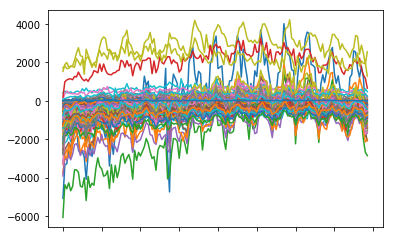

In [172]:
change.plot(legend = False);

In [155]:
change.to_csv("medium_change.csv")

### Deaths

In [244]:
deaths = pd.read_csv('raw_deaths.csv', index_col = 0, header=0 )

In [245]:
months = pd.date_range('2006-01-01','2017-01-01', 
              freq='MS').strftime("%Y-%b").tolist()

In [246]:
t = deaths.iloc[0,:].apply(lambda x: '-' in x).values
list_wod = [i for i, x in enumerate(t) if x]

In [247]:
deaths = deaths.drop(deaths.columns[list_wod], axis = 1)

deaths.columns = months

deaths = deaths.drop(deaths.index[[0]])

deaths = deaths.transpose()
deaths = deaths.apply(pd.to_numeric)

deaths.to_csv("medium_deaths.csv")

months = pd.date_range('2017-01-01','2019-02-01', 
              freq='MS').strftime("%Y-%b").tolist()

deaths = pd.read_csv('raw_deaths_new.csv', index_col = 0, header=0 )

t = deaths.iloc[0,:].apply(lambda x: '-' in x).values
list_wod = [i for i, x in enumerate(t) if x]

deaths = deaths.drop(deaths.columns[list_wod], axis = 1)

deaths.columns = months

deaths = deaths.drop(deaths.index[[0]])
deaths = deaths.transpose()
deaths = deaths.apply(pd.to_numeric)

deaths_old = pd.read_csv('medium_deaths.csv', index_col = 0, header=0).iloc[:-1,:]

deaths = deaths_old.append(deaths)

In [248]:
deaths.to_csv("medium_deaths.csv")

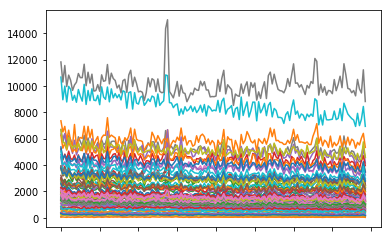

In [249]:
deaths.plot(legend = False);

### Deaths 1st

In [250]:
deaths = pd.read_csv('raw_deaths_first.csv', index_col = 0, header=0 )

months = pd.date_range('2006-01-01','2017-01-01', 
              freq='MS').strftime("%Y-%b").tolist()

t = deaths.iloc[0,:].apply(lambda x: '-' in x).values
list_wod = [i for i, x in enumerate(t) if x]

deaths = deaths.drop(deaths.columns[list_wod], axis = 1)

deaths.columns = months

deaths = deaths.drop(deaths.index[[0]])

deaths = deaths.transpose()
deaths = deaths.apply(pd.to_numeric)

deaths.to_csv("medium_deaths_first.csv")

In [251]:
months = pd.date_range('2017-01-01','2019-01-01', 
              freq='MS').strftime("%Y-%b").tolist()

deaths = pd.read_csv('raw_deaths_first_new.csv', index_col = 0, header=0 )

t = deaths.iloc[0,:].apply(lambda x: '-' in x).values
list_wod = [i for i, x in enumerate(t) if x]

deaths = deaths.drop(deaths.columns[list_wod], axis = 1)

deaths.columns = months

deaths = deaths.drop(deaths.index[[0]])
deaths = deaths.transpose()
deaths = deaths.apply(pd.to_numeric)

deaths_old = pd.read_csv('medium_deaths_first.csv', index_col = 0, header=0).iloc[:-1,:]

deaths = deaths_old.append(deaths)

deaths.to_csv("medium_deaths_first.csv")

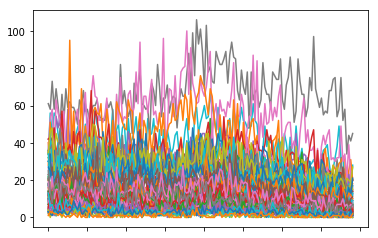

In [252]:
deaths.plot(legend = False);

### Deaths types

In [270]:
deaths = pd.read_csv('raw_deaths_types.csv', index_col = (0,1), header=0 )

In [271]:
months = pd.date_range('2006-01-01','2019-01-01', 
              freq='MS').strftime("%Y-%b").tolist()

In [272]:
deaths.columns = months
deaths = deaths.drop(deaths.index[[0]])

In [273]:
deaths = deaths.transpose()
deaths = deaths.apply(pd.to_numeric)

In [275]:
deaths.to_csv("medium_deaths_types.csv")

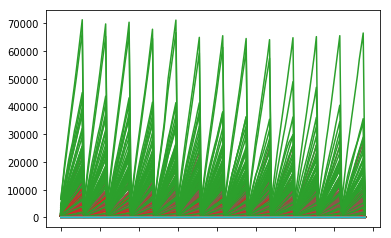

In [276]:
deaths.plot(legend = False);

In [321]:
deaths_in_diff = deaths.iloc[0::12, :]

In [322]:
for i in range(13):
    a = deaths.iloc[(i*12):((i+1)*12+1), :].diff()
    deaths_in_diff = deaths_in_diff.append(a[1:-1])

In [329]:
deaths_in_diff.index = pd.to_datetime(deaths_in_diff.index)

In [330]:
deaths_in_diff = deaths_in_diff.sort_index()

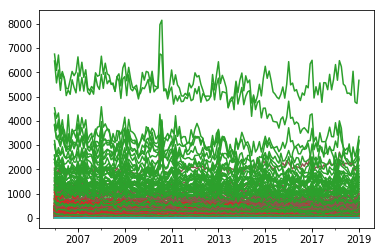

In [318]:
deaths_in_diff.plot(legend = False);

In [332]:
deaths_in_diff.index  =  deaths_in_diff.index.strftime("%Y-%b")

In [335]:
deaths_in_diff.to_csv("medium_deaths_types.csv")

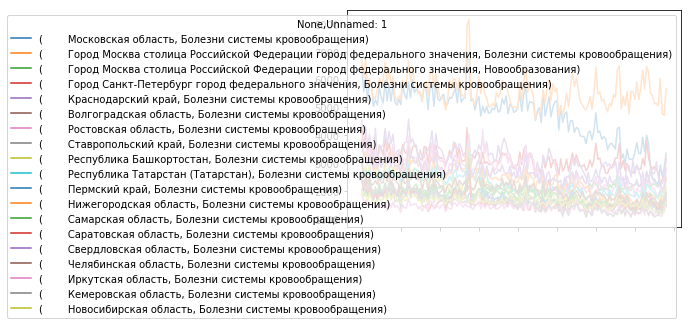

In [362]:
t = (deaths_in_diff>1000).apply(lambda x: all(x), axis=0).values

list_wod = [i for i, x in enumerate(t) if x]

deaths_in_diff.iloc[:, list_wod].plot();

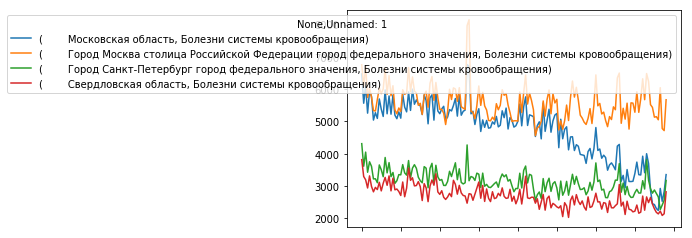

In [363]:
t = (deaths_in_diff>2000).apply(lambda x: all(x), axis=0).values

list_wod = [i for i, x in enumerate(t) if x]

deaths_in_diff.iloc[:, list_wod].plot();